# Assignment 3: Eigenvectors, eigenvalues, Google PageRank

In [4]:
import numpy as np
import numpy.linalg as la
import networkx as nx
import matplotlib.pyplot as plt

## Question 1: eigenvalues and eigenvectors

Matrix  $M=\pmatrix{-4 & 1 & 2 \\ 1 &  5 &  -1 \\ 2 & -1 & 4}$ is given.

1. Find eigenvalues and eigenvectors of the matrix.



2. The eigenvectors are three-dimensional. Plot projections of eigenvectors on each of 2-dimensional spaces. Hint: a three-dimensional vector $(x_1, x_2, x_3)$ has 3  two-dimensional projections: $(x_1, x_2)$, $(x_1, x_3)$, $(x_2, x_3)$.

3. Find a matrix with the same eigenvectors but different eigenvalues.

4. Find a matrix with the same eigenvalues but different eigenvectors.

5. Write a function that, given a list of eigenvalues, returns a matrix with those eigenvalues. Example:

```
>> eigenvalues_to_matrix([0, 2])
[[1, -1],
 [-1, 1]]
```

Demonstrate the function on 1, 3, and 6-dimensional arguments (for example, `egienvalues_to_matrix([1])`, `eigenvalues_to_matrix([1, 5, 3])`, eigenvalues_to_matrix([-3, 0, -1, 5, 2.5, 0.3]).

## Question 2: Google PageRank

A directed graph $G$ is given:

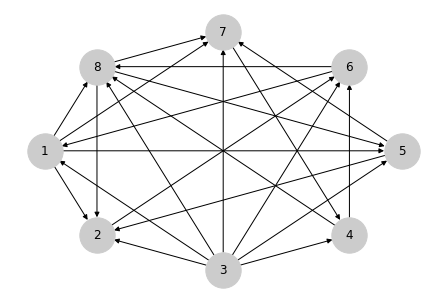

1. Write adjacency matrix $A$ for $G$.

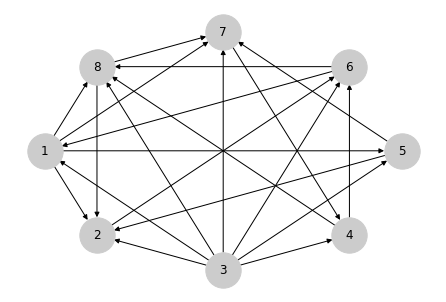

In [9]:
A = np.array([[0, 1 ,0 ,0 ,1, 0 ,1, 1],
     [0 ,0, 0, 0 ,0, 1, 0, 0],
     [1, 1, 0, 1, 1, 1, 1, 1],
     [0, 0, 0, 0, 0, 1, 0, 1],
     [0, 1, 0, 0, 0, 0, 1, 0],
     [1,  0, 0, 0, 0, 0, 0, 1],
     [0, 0, 0, 1, 0, 0, 0, 0],
     [0, 1, 0, 0, 0, 0, 1, 0]]).T
def plot_graph(A, node_size=1/A.shape[0], node_color="#ccc"):
    g = nx.from_numpy_matrix(A.T, create_using=nx.DiGraph())
    nx.draw_shell(g, labels=dict((i, str(i+1)) for i in g.nodes), arrows=True,
                     node_size=10000*node_size, node_color=node_color)
plot_graph(A)

2. Compute Google PageRank of all nodes in $G$. Plot the graph with node sizes proportional to the ranks.

In [13]:
A = A/np.sum(A, axis=0)
plot_graph(A, node_color="#9cf")

def pagerank_algebraic(A, d=0.85):
    """PageRank: The trillion dollar algorithm.

    Parameters
    ----------
    A : numpy array
        adjacency matrix where A_i,j represents the link from 'j' to 'i',
        such that for all 'j' sum(i, A_i,j) = 1
    d : float, optional
        damping factor, by default 0.85

    Returns
    -------
    numpy array
        a vector of ranks such that v_i is the i-th rank from [0, 1],
        v sums to 1

    """
    N = A.shape[0]
    return  la.inv(np.eye(N) - d * A) @ ((1-d)/N*np.ones(N).T)
pagerank_algebraic(A.T)

array([0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125])

3. Change the graph edges (the adjacency matrix) such that node 1 has the highest rank. Plot the changed graph with node sizes proportional to the ranks.

4. Invert the direction of all edges in G. Compute the PageRank and plot the inverted graph with node sizes proportional to the ranks.

5. How many iterations of iterative PageRank algorithm are required to approximate the exact (algebraic) PageRank algorithm with 0.01% accuracy?